In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
column_drop=['Unnamed: 2','Unnamed: 3','Unnamed: 4']
df.drop(columns=column_drop, inplace=True)

In [7]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df[df.duplicated()]

,v1,v2
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   object
 1   v2      5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [11]:
df.describe()

,v1,v2
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [12]:
df['v1'].value_counts()

v1
ham     4516
spam     653
Name: count, dtype: int64

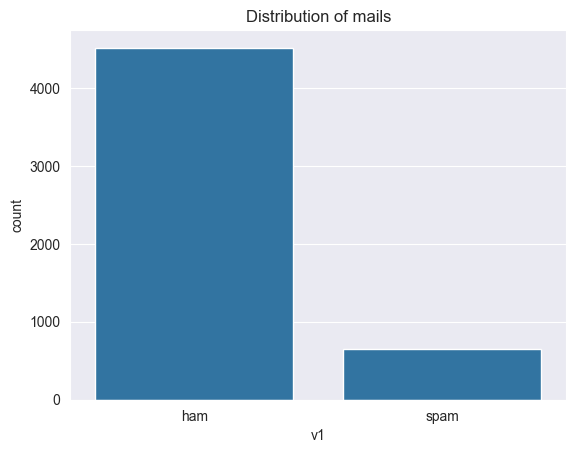

In [13]:
sns.countplot(data=df, x='v1')
plt.xlabel('v1')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

In [14]:
df.loc[df["v1"] == "spam", "Category"] = 0
df.loc[df["v1"] == "ham", "Category"] = 1

df.head()

,v1,v2,Category
0,ham,"Go until jurong point, crazy.. Available only ...",1.0
1,ham,Ok lar... Joking wif u oni...,1.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.0
3,ham,U dun say so early hor... U c already then say...,1.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",1.0


In [15]:
X = df['v2']
Y = df['Category']

In [17]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5169, dtype: object

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=2)

In [19]:
X_train

2118    U can WIN å£100 of Music Gift Vouchers every w...
1019                      Don know..wait i will check it.
1881                              Ok.. ÌÏ finishing soon?
2575                 Now thats going to ruin your thesis!
4858    Hey, a guy I know is breathing down my neck to...
                              ...                        
3534                             I'm at home. Please call
1124                   Aiyar sorry lor forgot 2 tell u...
2628    Haha... They cant what... At the most tmr forf...
3833           Watching tv lor. Nice one then i like lor.
2694    Hey sexy buns! What of that day? No word from ...
Name: v2, Length: 3618, dtype: object

In [20]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5169,)
(3618,)
(1551,)


In [21]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)

# Convert the training and testing text messages into numerical features using TF-IDF

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Convert the target values into 0 and 1

Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

In [22]:
print(X_train_features)

  (0, 274)	0.28469841570534354
  (0, 757)	0.2382703692823207
  (0, 309)	0.28469841570534354
  (0, 5479)	0.28469841570534354
  (0, 1666)	0.18521698912601275
  (0, 3176)	0.28469841570534354
  (0, 6726)	0.16969158756163835
  (0, 6243)	0.28469841570534354
  (0, 603)	0.24274243659325892
  (0, 2157)	0.1929056107731498
  (0, 6682)	0.2059490803121428
  (0, 6265)	0.15269186047504035
  (0, 5701)	0.24274243659325892
  (0, 6566)	0.16515206653974776
  (0, 6468)	0.23079712301516783
  (0, 2768)	0.21505634607080928
  (0, 4120)	0.22760511302317224
  (0, 234)	0.20290236667023745
  (0, 6626)	0.18521698912601275
  (1, 1536)	0.5888338190512723
  (1, 6486)	0.5280141801118141
  (1, 3501)	0.4067379480769643
  (1, 2132)	0.45720892460283746
  (2, 5579)	0.4697175168946937
  (2, 2524)	0.6743730717061566
  :	:
  (3612, 4940)	0.4429207609150278
  (3612, 3694)	0.38321599910309895
  (3612, 6141)	0.4110511297018481
  (3613, 3066)	1.0
  (3614, 782)	0.6262002443728721
  (3614, 2608)	0.468640976347078
  (3614, 5588)	0.36

In [23]:
print(Y_train)

2118    0
1019    1
1881    1
2575    1
4858    1
       ..
3534    1
1124    1
2628    1
3833    1
2694    1
Name: Category, Length: 3618, dtype: int64


In [24]:
model = LogisticRegression()
model.fit(X_train_features,Y_train)

LogisticRegression()

In [25]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

# Print accuracy
print('Accuracy on training data: {} %'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {} %'.format(accuracy_on_test_data * 100))

Accuracy on training data: 96.01990049751244 %
Accuracy on test data: 95.80915538362346 %


In [26]:
input_mail = ["Congratulations on your recent achievement! Well done."]
input_data_features = feature_extraction.transform(input_mail)
prediction = model.predict(input_data_features)

if (prediction)[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Ham Mail


In [27]:
input_mail = ["Congratulations! You have won $10000 from an online game. Click the link to claim your prize now!"]
input_data_features = feature_extraction.transform(input_mail)
prediction = model.predict(input_data_features)

if (prediction)[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Spam Mail


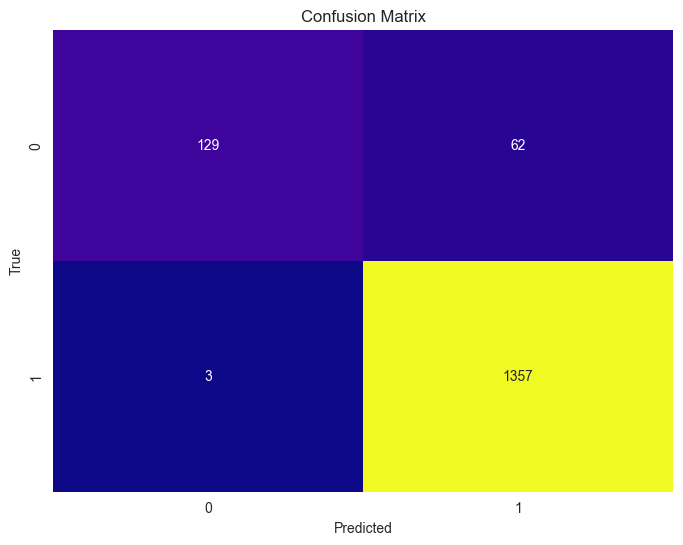

In [28]:
cm = confusion_matrix(Y_test,prediction_on_test_data)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap="plasma", cbar=False)
plt.xlabel("Predicted")
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()